In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()


df.set_index(['Country'],inplace=True)
spa = pd.DataFrame(df.loc['Spain'])



spa.reset_index(inplace=True)
spa=spa.drop(['Country','Trimestre'],axis=1)

In [3]:
dftest = adfuller(spa['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(spa['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(spa['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(spa['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print(f'Financial Index Non stationary')

Gdp growth is Stationary 
Current Account Non stationary
Public Debt Non stationary
Financial Index Non stationary


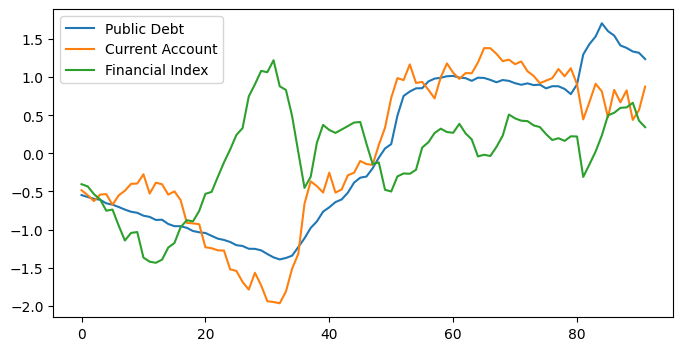

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(spa['Public Debt'], label='Public Debt')
plt.plot(spa['Current Account'], label='Current Account')
plt.plot(spa['Financial index'], label='Financial Index')


plt.legend()

In [5]:
from statsmodels.tsa.api import VAR
model = VAR(spa)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,-4.565,-4.450,0.01040,-4.519
1,-13.80,-13.22,1.013e-06,-13.57
2,-14.33,-13.29*,5.972e-07,-13.92
3,-14.60*,-13.10,4.610e-07*,-14.00*
4,-14.50,-12.53,5.162e-07,-13.71
5,-14.60,-12.17,4.780e-07,-13.62
6,-14.45,-11.55,5.729e-07,-13.28
7,-14.44,-11.08,6.023e-07,-13.09
8,-14.45,-10.63,6.351e-07,-12.91


In [6]:
spa_coin = spa.drop('Gdp growth',axis=1)
spa_coin

,Current Account,Public Debt,Financial index
0,-0.483783,-0.546737,-0.404494
1,-0.548441,-0.572808,-0.433159
2,-0.625675,-0.596134,-0.534213
3,-0.540733,-0.608209,-0.603700
4,-0.534539,-0.655549,-0.752301
...,...,...,...
87,0.670172,1.416611,0.597419
88,0.826576,1.384160,0.603509
89,0.439632,1.337164,0.664300
90,0.567609,1.320217,0.429638


In [7]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(spa_coin, det_order=1, k_ar_diff=3)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1', 'r<=2'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1", "r<=2"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)

      trace_stat
r=0    32.922930
r<=1   17.501861
r<=2    5.238235 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   32.0645  35.0116  41.0815
r<=1  16.1619  18.3985  23.1485
r<=2   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.16074393 0.13008467 0.05778839] 

Eigenvectors:
          0         1         2
0  1.304063 -3.266703 -2.255067
1 -1.875708  3.148123 -1.459111
2 -2.675499  0.953434 -1.505347


In [6]:
spa['Gdp growth']=spa['Gdp growth']
spa['Current Account'] = spa['Current Account'].diff(1)
spa['Public Debt'] = spa['Public Debt'].diff(1)
spa['Financial index'] = spa['Financial index'].diff(1)

spa=spa.iloc[2:]

In [7]:
dftest = adfuller(spa['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(spa['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(spa['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')

Current Account is Stationary
Public Debt is Stationary
Financial Index is Stationary


In [8]:
from statsmodels.tsa.api import VAR
model = VAR(spa)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-13.47,-13.35,1.415e-06,-13.42
1,-14.34,-13.75*,5.943e-07,-14.10*
2,-14.35,-13.29,5.896e-07,-13.92
3,-14.40*,-12.87,5.646e-07*,-13.79
4,-14.36,-12.36,5.964e-07,-13.56
5,-14.25,-11.78,6.801e-07,-13.26
6,-14.09,-11.15,8.257e-07,-12.91
7,-14.20,-10.80,7.710e-07,-12.84
8,-13.98,-10.10,1.033e-06,-12.42


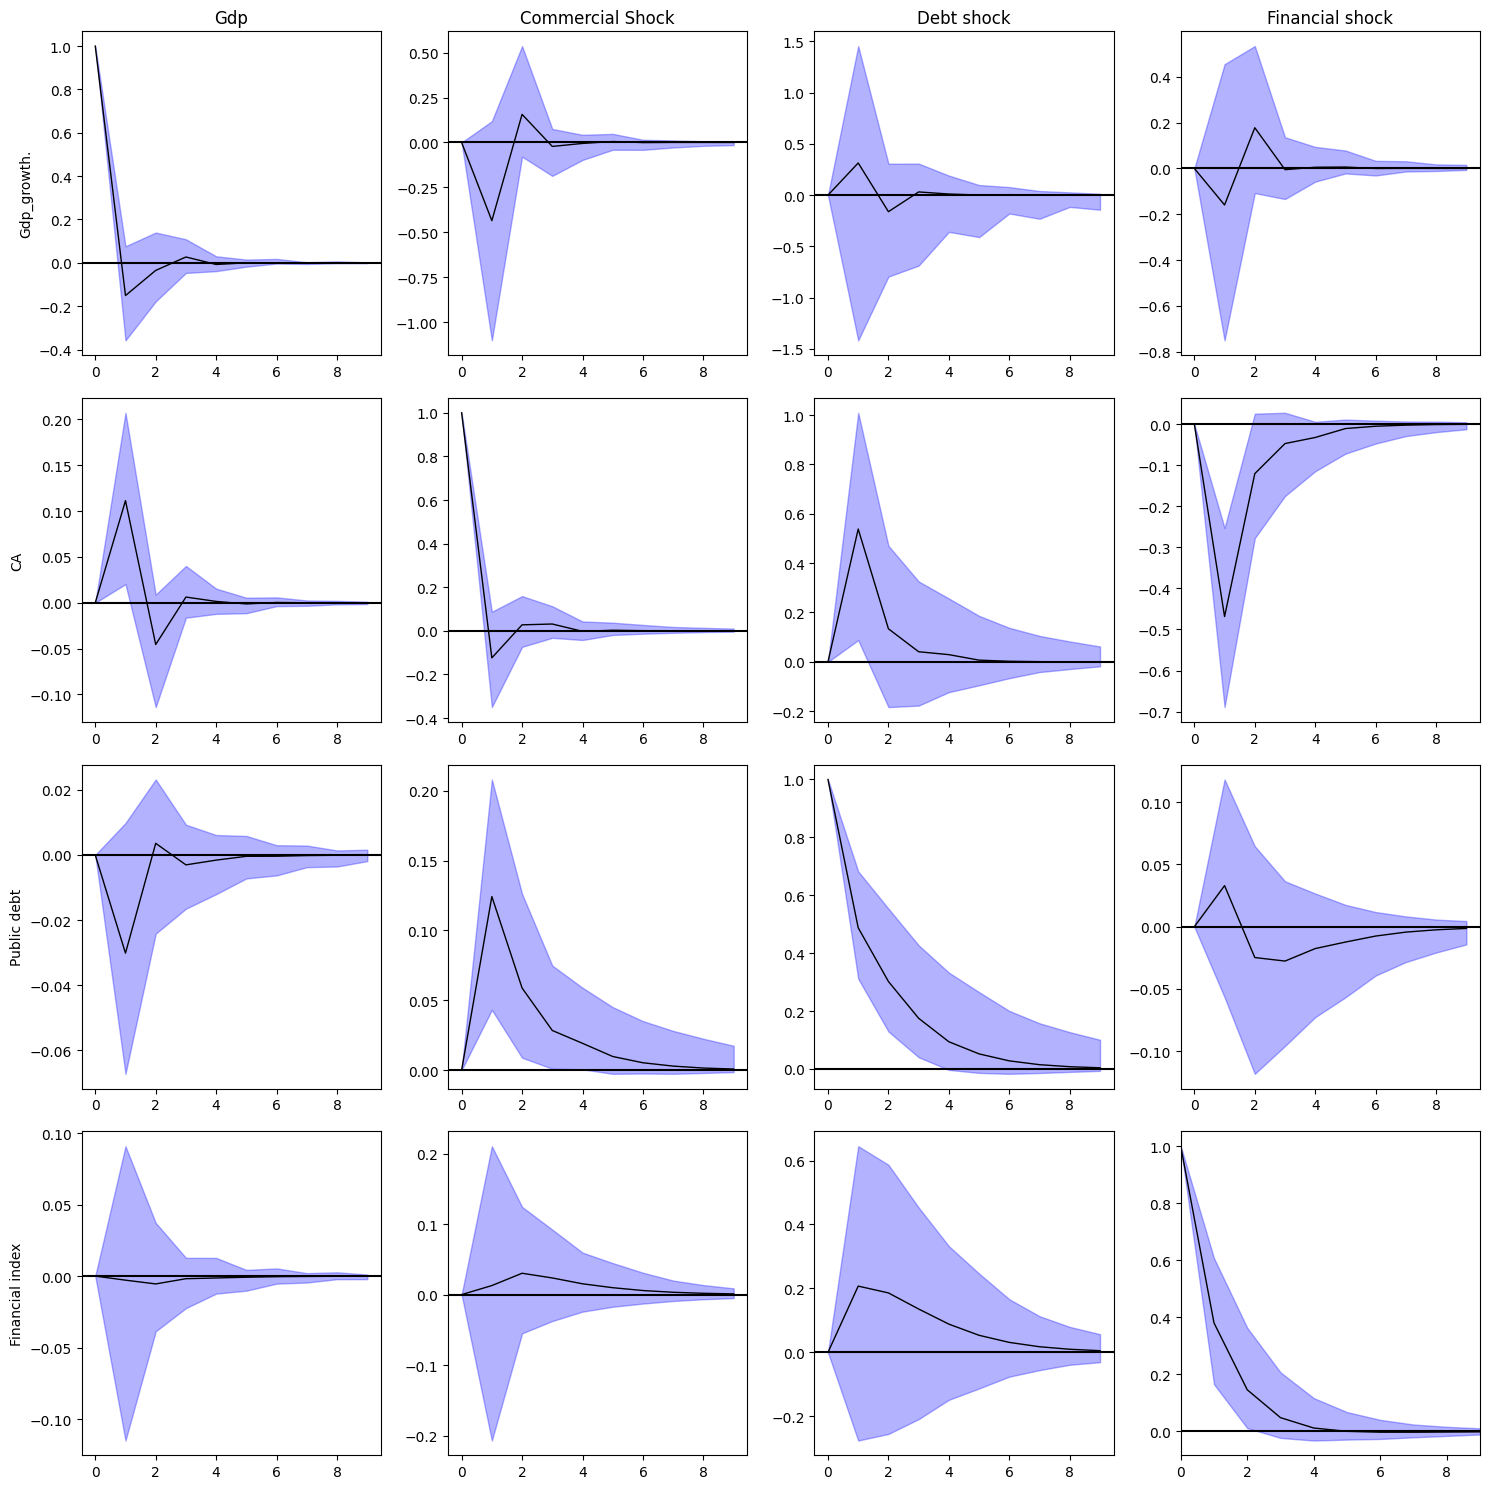

In [10]:
m = 4  #Considered Variable
p = 1 #Number of lags based on AIC criterion
c = 1  #Constant term
h = 10 #IRF horizon

T = len(spa)
Y = spa.iloc[p:, :] #Building a VAR(5) is not possible to consider first 5 observations

X_lagged  = pd.DataFrame()
for col in spa.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = spa[col].shift(i)
X_lagged = X_lagged.iloc[p:,:]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) 
                                               if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) 
                                               for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + 
                                               [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)


pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y) 
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
[pi_hat[1:, :].T],
[np.eye(m * p - m), np.zeros((m * p - m, m))]
])



PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]






PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp_growth.', 'CA', 'Public debt','Financial index']
Shocknames = ['Gdp', 'Commercial Shock', 'Debt shock','Financial shock']
ylab=0
# Bootstrap simulation to compute confidence intervals
n_bootstrap = 1000
alpha = 0.05
bootstrap_phis = np.zeros((n_bootstrap, m, m, h))

for b in range(n_bootstrap):
    # Resample residuals
    resampled_err = err.sample(frac=1, replace=True).values
    Y_bootstrap = Y_fit + resampled_err

    # Re-estimate the VAR model
    pi_hat_bootstrap = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y_bootstrap)
    A_comp_bootstrap = np.block([
        [pi_hat_bootstrap[1:, :].T],
        [np.eye(m * p - m), np.zeros((m * p - m, m))]
    ])

    for j in range(h):
        PHI_comp_bootstrap = np.linalg.matrix_power(A_comp_bootstrap, j)
        bootstrap_phis[b, :, :, j] = PHI_comp_bootstrap[:m, :m]

lower_bound = np.percentile(bootstrap_phis, alpha/2*100, axis=0)
upper_bound = np.percentile(bootstrap_phis, (1-alpha/2)*100, axis=0)

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m):
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    lb = lower_bound[k // m, k % m, :]
    ub = upper_bound[k // m, k % m, :]
    ax.fill_between(np.arange(h), lb, ub, color='blue', alpha=0.3)
    ax.axhline(0, color='k', linestyle='-')
    if k < 4:
        ax.set_title(Shocknames[k])
    if k in [0, 4, 8, 12]:  # Corrected indices for labels
        ax.set_ylabel(VARnames[ylab])
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout()
plt.show()

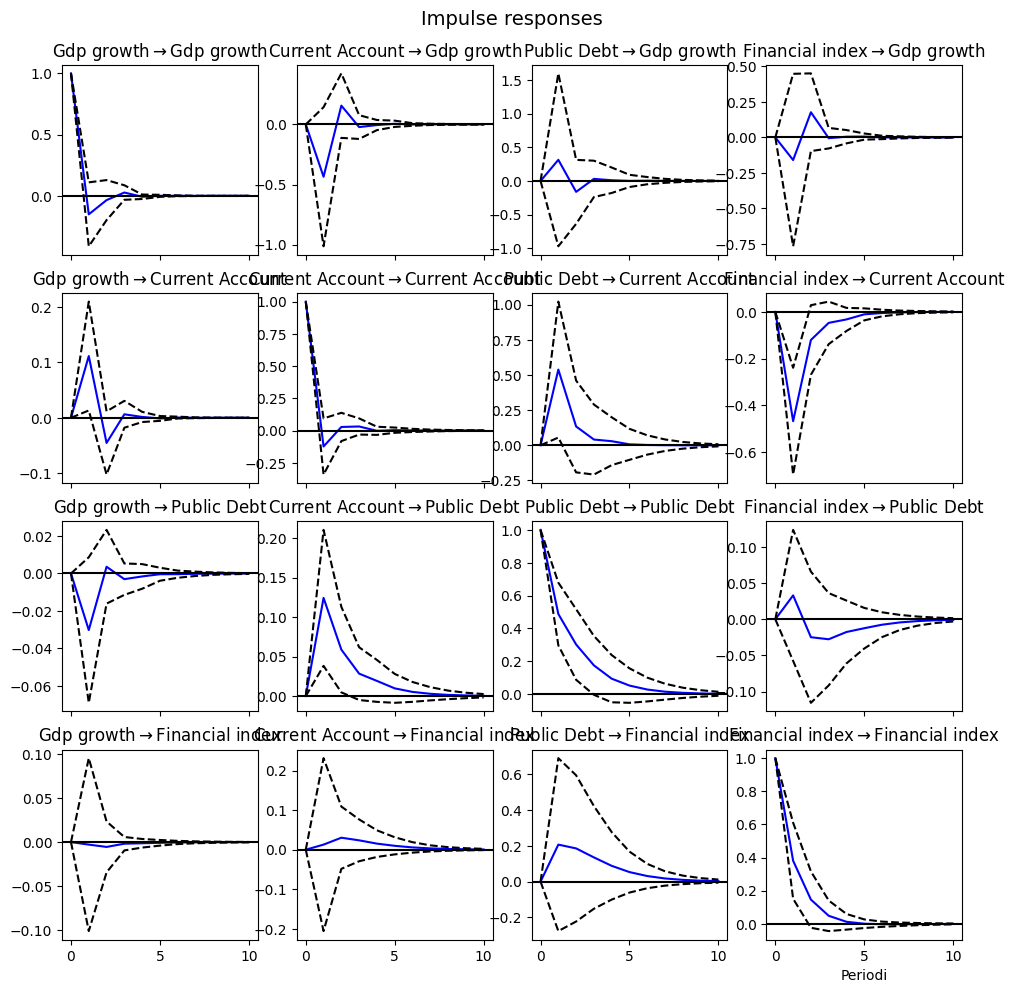

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 150.674, critical value: 173.004>, p-value: 0.335>


In [11]:
model = sm.tsa.VAR(spa)

# Stima il modello con un ordine di 6
results = model.fit(1)
irf = results.irf(10)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()

whiteness_test_result = results.test_whiteness(nlags=10)
print(whiteness_test_result)

In [12]:
coefficents = pd.DataFrame(pi_hat)
coefficents.columns = ['Gdp growth','Current Account','Public Debt','Financial index']
coefficents.index = ['Const.','Gdp_l1','Ca_l1','Pd_l1','Fi_l1',]
coefficents=coefficents.transpose()
coefficents

,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth,-0.125258,-0.150805,-0.435204,0.313808,-0.159647
Current Account,0.023576,0.111445,-0.123679,0.538247,-0.468582
Public Debt,0.005084,-0.030195,0.124277,0.487723,0.032991
Financial index,0.001296,-0.002850,0.012847,0.207288,0.380707


In [13]:
sigma_hat = np.dot(err.T, err) / (T - p - 1)
X_lagged_inv = np.linalg.inv(np.dot(X_lagged.T, X_lagged))
var_cov_matrix = np.kron(sigma_hat, X_lagged_inv)
std_err = np.sqrt(np.diag(var_cov_matrix).reshape(pi_hat.shape))

# Create DataFrame for standard errors
std_err_df = pd.DataFrame(std_err, index=coefficents.columns, columns=[col + '_std' for col in coefficents.index])
std_err_df=std_err_df.transpose()

t_values = pi_hat / std_err
t_values_df = pd.DataFrame(t_values, index=coefficents.columns, columns=[col + '_t' for col in coefficents.index])


In [14]:
from scipy.stats import t
degrees_of_freedom = T - (m * p) - 1
p_values = 2 * (1 - t.cdf(np.abs(t_values), df=degrees_of_freedom))

# Create DataFrame for p-values
p_values_df = pd.DataFrame(p_values, index=coefficents.columns, columns=[col + '_p' for col in coefficents.index])
print("p-values DataFrame:")
p_values_df.transpose()

p-values DataFrame:


,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth_p,0.014928,6.201178e-01,0.074272,1.332212e-10,0.001652
Current Account_p,0.856671,8.142675e-08,0.281588,2.031298e-07,0.000044
Public Debt_p,0.985976,5.393941e-01,0.000000,0.000000e+00,0.891610
Financial index_p,0.998387,9.791245e-01,0.508786,0.000000e+00,0.001295


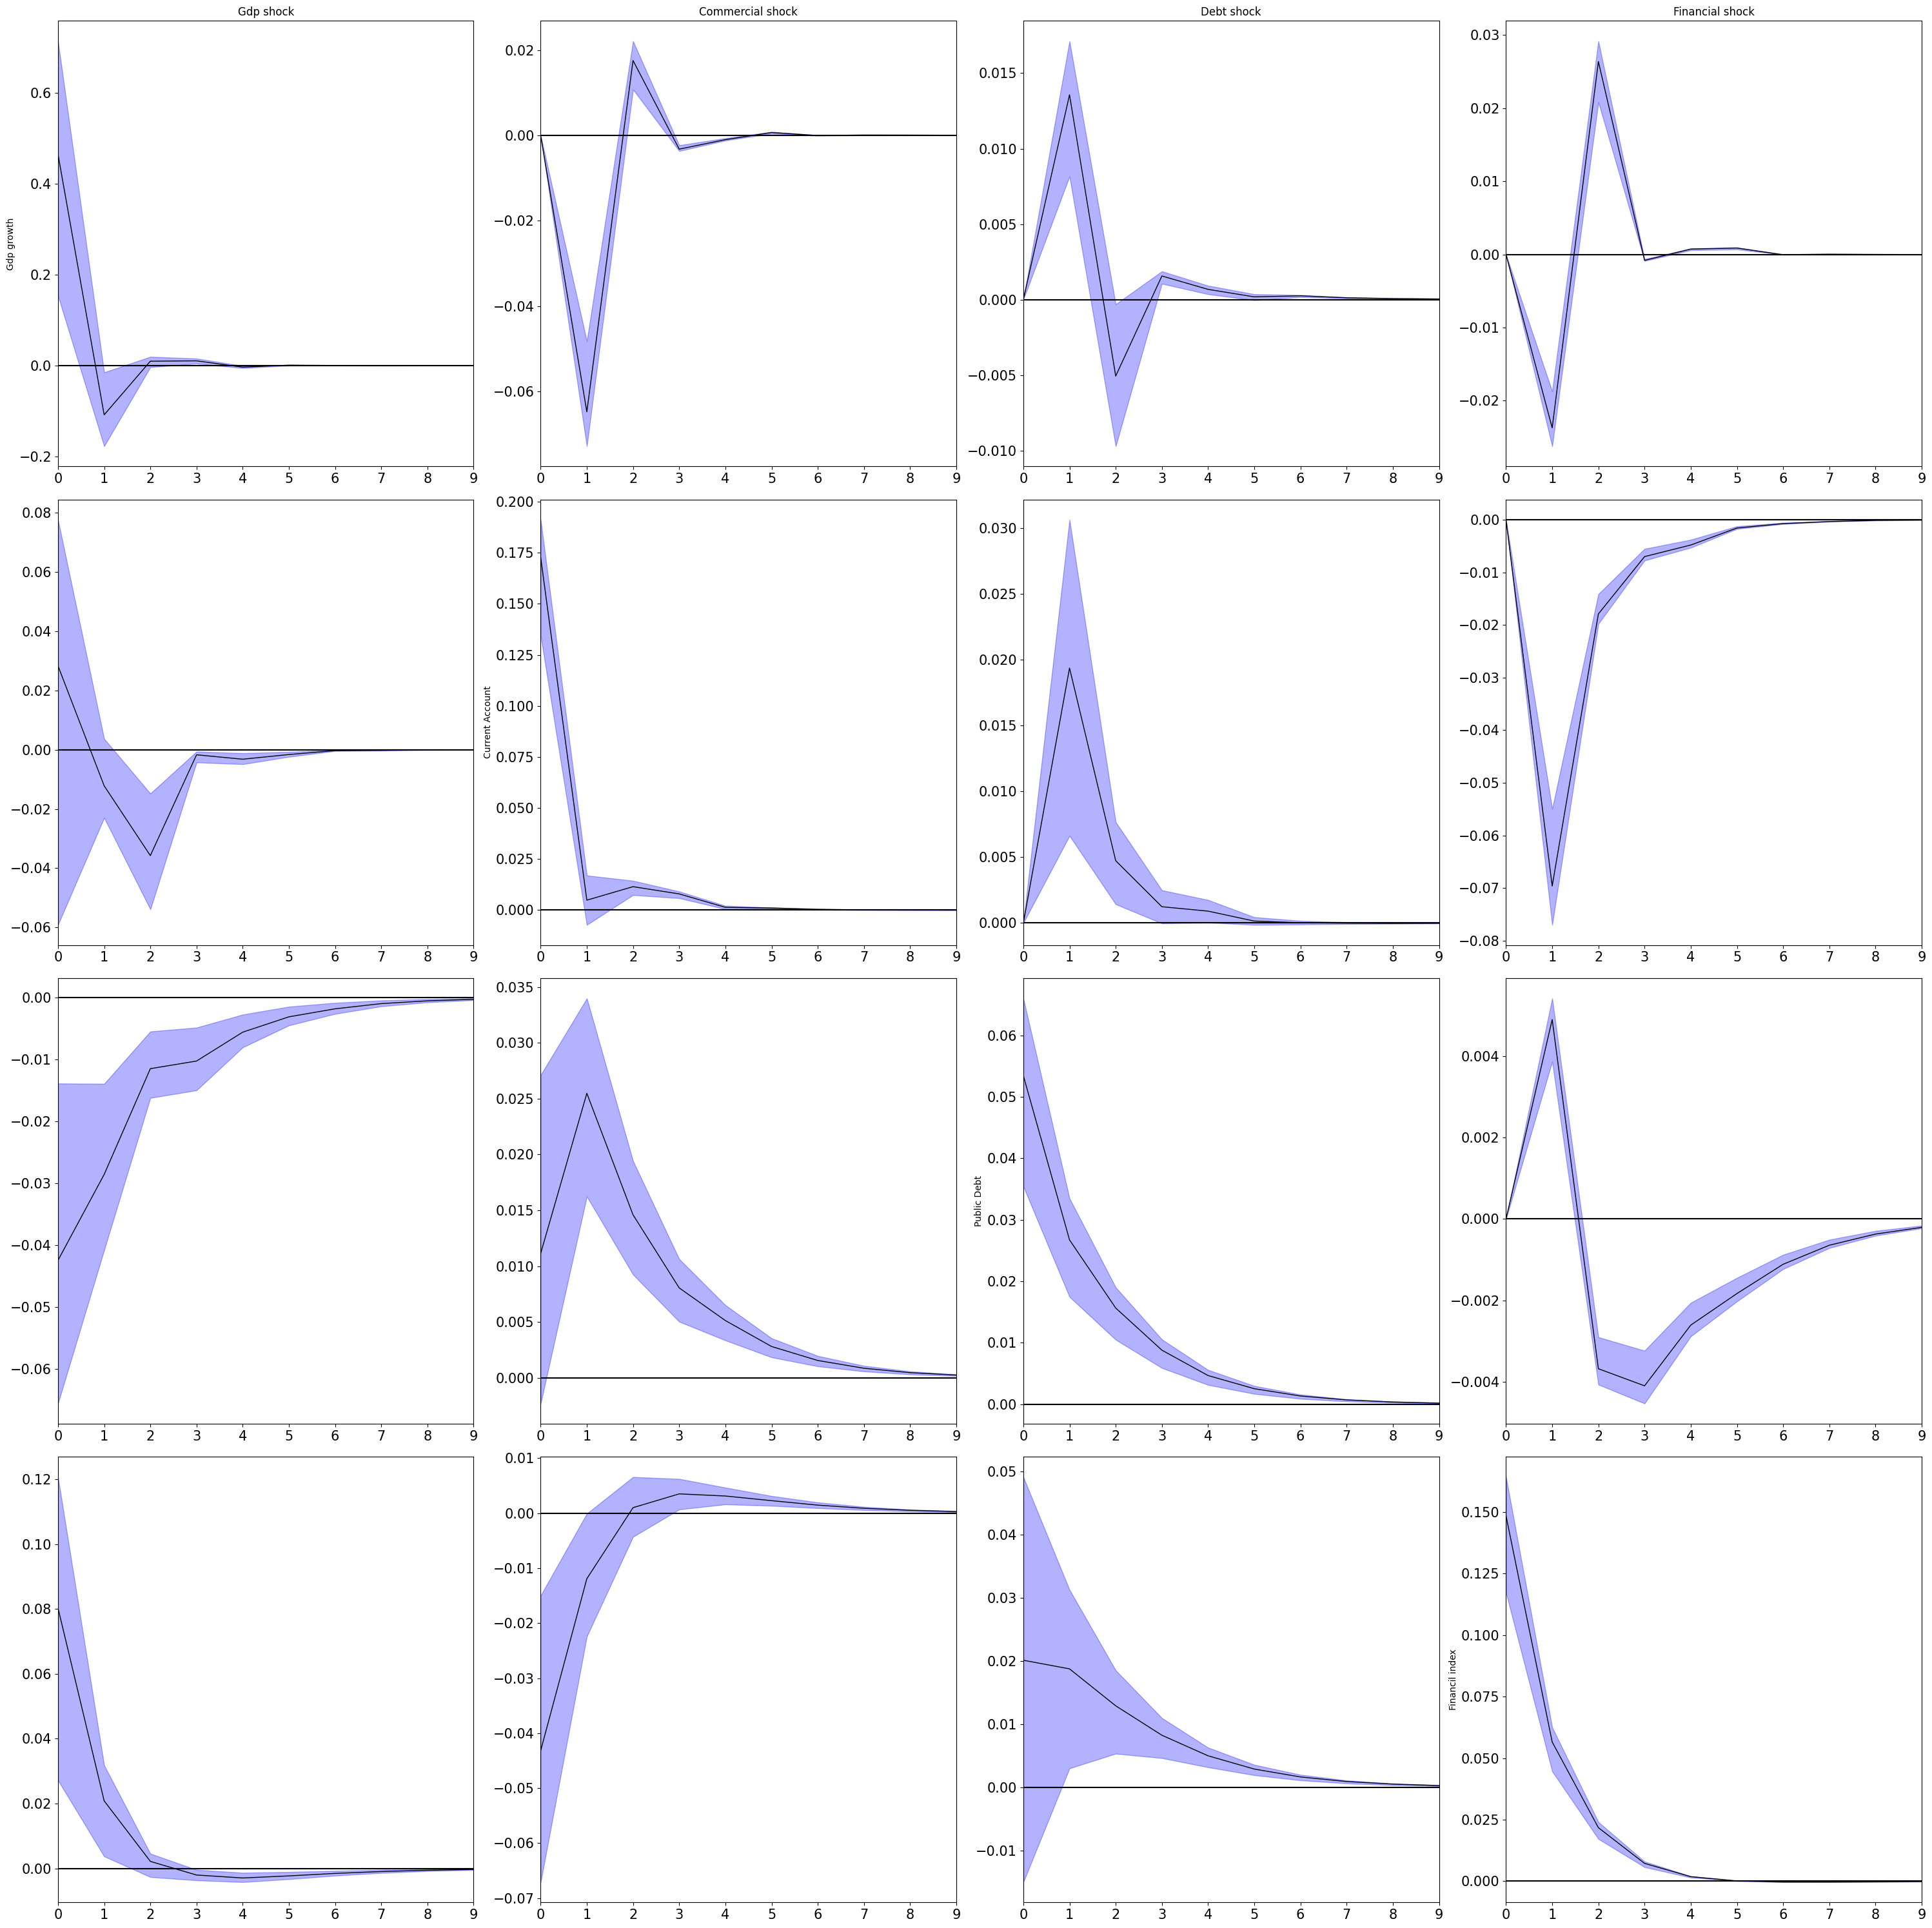

In [16]:

T = len(spa) - m * p - m

omega = np.dot(err.T, err) / T

P = np.linalg.cholesky(omega)
PHI_SR = np.zeros((m, m, h))

for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
    
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0

ffig, axes = plt.subplots(m, m, figsize=(30, 30))
axes_flat = axes.flatten()
ylab = 0

# Parametri del bootstrap
B = 1000  # Numero di bootstrap
percentile = 95  # Intervallo di confidenza del 95%

# Bootstrap per calcolare gli intervalli di confidenza
PHI_SR_bootstrap = np.zeros((B, h, m * m))

for b in range(B):
    # Resampling con ripetizione dei residui
    err_bootstrap = err.sample(n=T, replace=True, axis=0).to_numpy()
    
    # Calcolo della matrice di covarianza dei residui bootstrap
    omega_bootstrap = np.dot(err_bootstrap.T, err_bootstrap) / T
    
    # Decomposizione di Cholesky di omega_bootstrap
    P_bootstrap = np.linalg.cholesky(omega_bootstrap)
    
    # Calcolo delle IRF bootstrap
    PHI_SR_bootstrap_b = np.zeros((m, m, h))
    for i in range(h):
        PHI_SR_bootstrap_b[:, :, i] = np.dot(PHI[:, :, i], P_bootstrap)
    
    PHI_SR_bootstrap[b, :, :] = np.reshape(np.transpose(PHI_SR_bootstrap_b, (2, 0, 1)), (h, m * m))

# Calcolo degli intervalli di confidenza
lower_bound = np.percentile(PHI_SR_bootstrap, (100 - percentile) / 2, axis=0)
upper_bound = np.percentile(PHI_SR_bootstrap, 100 - (100 - percentile) / 2, axis=0)

# Grafico delle IRF con intervalli di confidenza
for k in range(m * m):
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k', label='IRF')
    ax.fill_between(np.arange(h), lower_bound[:, k], upper_bound[:, k], color='blue', alpha=0.3, label='CI')
    ax.axhline(0, color='k', linestyle='-')
    
    if k < 4: 
        ax.set_title(Shocknames[k])
    if k in [0, 5, 10, 15]: 
        ax.set_ylabel(VARnames[ylab])
        ylab += 1

    ax.set_xlim([0, h - 1])
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

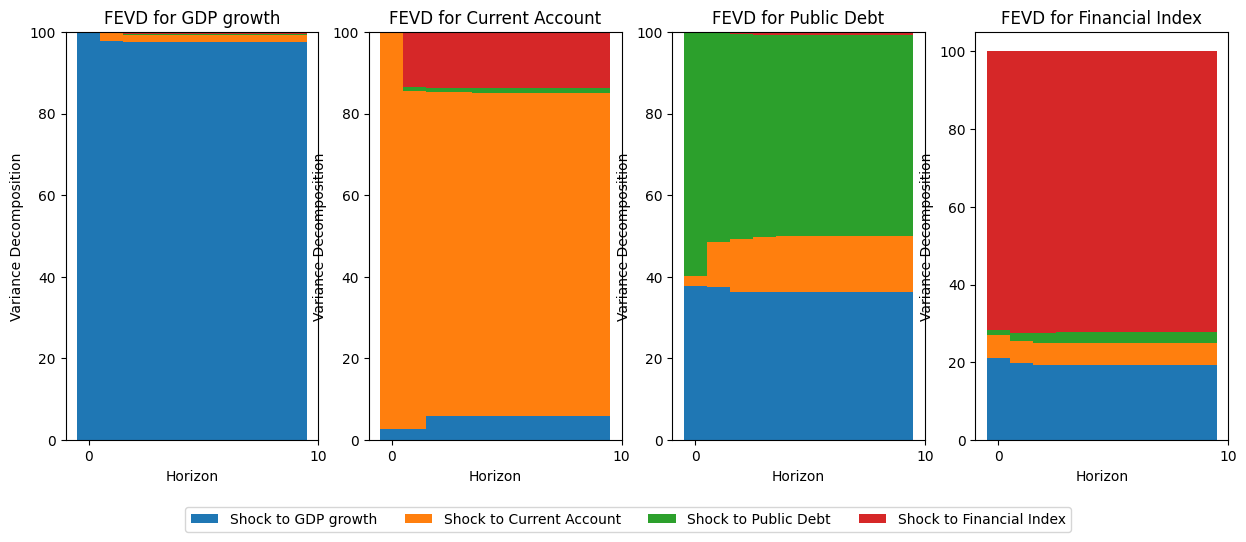

In [17]:
h = 10
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(spa[['Current Account', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.1331 , p=0.0008  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=12.5564 , p=0.0004  , df=1
likelihood ratio test: chi2=11.7460 , p=0.0006  , df=1
parameter F test:         F=12.1331 , p=0.0008  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.2015 , p=0.0001  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=21.6321 , p=0.0000  , df=2
likelihood ratio test: chi2=19.3418 , p=0.0001  , df=2
parameter F test:         F=10.2015 , p=0.0001  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7799  , p=0.0004  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=22.1195 , p=0.0001  , df=3
likelihood ratio test: chi2=19.7086 , p=0.0002  , df=3
parameter F test:         F=6.7799  , p=0.0004  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (12.13311488532851, 0.0007813578157311229, 86.0, 1),
   'ssr_chi2test': (12.55636307900276, 0.00039485947441336244, 1),
   'lrtest': (11.746004254919171, 0.0006097399959947569, 1),
   'params_ftest': (12.133114885328531, 0.0007813578157311184, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (10.201509822547354, 0.00010929798140284222, 83.0, 2),
   'ssr_chi2test': (21.632117214076317, 2.0074532079151166e-05, 2),
   'lrtest': (19.341833049634715, 6.309200343988249e-05, 2),
   'params_ftest': (10.201509822547353, 0.00010929798140284222, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.779917635230589, 0.0003936939534055387, 80.0, 3),
   'ssr_chi2test': (22.1194812849398, 6.160153739837646e-05, 3),
   'lrtest': (19.708572997369913, 0.0001950591849065524, 3),
   'params_ftest': (6.779917635230592, 0.0003936939534055387, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 

In [19]:
grangercausalitytests(spa[['Public Debt', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2515  , p=0.6173  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=0.2603  , p=0.6099  , df=1
likelihood ratio test: chi2=0.2599  , p=0.6102  , df=1
parameter F test:         F=0.2515  , p=0.6173  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3403  , p=0.0403  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=7.0829  , p=0.0290  , df=2
likelihood ratio test: chi2=6.8123  , p=0.0332  , df=2
parameter F test:         F=3.3403  , p=0.0403  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1319  , p=0.0301  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=10.2179 , p=0.0168  , df=3
likelihood ratio test: chi2=9.6610  , p=0.0217  , df=3
parameter F test:         F=3.1319  , p=0.0301  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (0.2514854038688614, 0.6173124347764274, 86.0, 1),
   'ssr_chi2test': (0.26025815051544965, 0.6099428574171221, 1),
   'lrtest': (0.25987836093202077, 0.6102037347663064, 1),
   'params_ftest': (0.2514854038688828, 0.6173124347764072, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.340253900030745, 0.04025051089154195, 83.0, 2),
   'ssr_chi2test': (7.082948028980857, 0.028970592521081046, 2),
   'lrtest': (6.8123293310160875, 0.03316816775689349, 2),
   'params_ftest': (3.3402539000307363, 0.04025051089154235, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.1319118395033914, 0.03012079677958613, 80.0, 3),
   'ssr_chi2test': (10.217862376379815, 0.01680217628990061, 3),
   'lrtest': (9.661032035237838, 0.021678539832749023, 3),
   'params_ftest': (3.131911839503396, 0.030120796779585957, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [18]:
grangercausalitytests(spa[['Gdp growth', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9944  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9943  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9943  , df=1
parameter F test:         F=0.0001  , p=0.9944  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7555  , p=0.4730  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=1.6020  , p=0.4489  , df=2
likelihood ratio test: chi2=1.5876  , p=0.4521  , df=2
parameter F test:         F=0.7555  , p=0.4730  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7301  , p=0.5370  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=2.3821  , p=0.4970  , df=3
likelihood ratio test: chi2=2.3501  , p=0.5030  , df=3
parameter F test:         F=0.7301  , p=0.5370  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (5.015206611316162e-05, 0.9943659804672813, 86.0, 1),
   'ssr_chi2test': (5.190155679152773e-05, 0.9942518711182697, 1),
   'lrtest': (5.190154166712091e-05, 0.9942518719557739, 1),
   'params_ftest': (5.0152066093049176e-05, 0.9943659804683539, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7554688969267851, 0.4729928907217622, 83.0, 2),
   'ssr_chi2test': (1.6019581428808938, 0.4488892542499002, 2),
   'lrtest': (1.5875516392648876, 0.45213439031664737, 2),
   'params_ftest': (0.755468896926765, 0.4729928907217711, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.7301449750047964, 0.5370104185362081, 80.0, 3),
   'ssr_chi2test': (2.3820979809531484, 0.49697577760917955, 3),
   'lrtest': (2.3500698542123644, 0.5029967685049568, 3),
   'params_ftest': (0.7301449750048009, 0.5370104185362046, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [19]:
grangercausalitytests(spa[['Financial index', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0491  , p=0.8251  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=0.0509  , p=0.8216  , df=1
likelihood ratio test: chi2=0.0508  , p=0.8216  , df=1
parameter F test:         F=0.0491  , p=0.8251  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1451  , p=0.8652  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=0.3076  , p=0.8574  , df=2
likelihood ratio test: chi2=0.3071  , p=0.8577  , df=2
parameter F test:         F=0.1451  , p=0.8652  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0799  , p=0.9707  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=0.2607  , p=0.9672  , df=3
likelihood ratio test: chi2=0.2603  , p=0.9673  , df=3
parameter F test:         F=0.0799  , p=0.9707  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (0.049148903893895035, 0.8250764981898258, 86.0, 1),
   'ssr_chi2test': (0.050863400541356484, 0.8215676457556431, 1),
   'lrtest': (0.05084887188814946, 0.8215927022595183, 1),
   'params_ftest': (0.04914890389384655, 0.8250764981898926, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.145069195490038, 0.865181273073296, 83.0, 2),
   'ssr_chi2test': (0.30761660730417695, 0.8574363726793559, 2),
   'lrtest': (0.3070801980435931, 0.8576663719267422, 2),
   'params_ftest': (0.1450691954900357, 0.865181273073296, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.07990188528799103, 0.9707425121585062, 80.0, 3),
   'ssr_chi2test': (0.2606799007520707, 0.9672455366557222, 3),
   'lrtest': (0.26029013883464813, 0.967315205278779, 3),
   'params_ftest': (0.07990188528798976, 0.9707425121585062, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [20]:
grangercausalitytests(spa[['Public Debt', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1941  , p=0.0147  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=6.4102  , p=0.0113  , df=1
likelihood ratio test: chi2=6.1898  , p=0.0128  , df=1
parameter F test:         F=6.1941  , p=0.0147  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6152  , p=0.0312  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=7.6659  , p=0.0216  , df=2
likelihood ratio test: chi2=7.3502  , p=0.0253  , df=2
parameter F test:         F=3.6152  , p=0.0312  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9820  , p=0.1233  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=6.4661  , p=0.0910  , df=3
likelihood ratio test: chi2=6.2371  , p=0.1006  , df=3
parameter F test:         F=1.9820  , p=0.1233  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (6.1941003430520505, 0.01474461785724084, 86.0, 1),
   'ssr_chi2test': (6.4101736108329375, 0.011346832061904762, 1),
   'lrtest': (6.189847174675492, 0.012848528194965975, 1),
   'params_ftest': (6.194100343052094, 0.014744617857240495, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.6151826133712377, 0.031232241191911245, 83.0, 2),
   'ssr_chi2test': (7.665929397028166, 0.02164534847808679, 2),
   'lrtest': (7.350235722045454, 0.025346417991924684, 2),
   'params_ftest': (3.6151826133712284, 0.0312322411919114, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.981959218254704, 0.12331303535892904, 80.0, 3),
   'ssr_chi2test': (6.466141949555971, 0.09100738818160668, 3),
   'lrtest': (6.237128646939539, 0.10062639260104063, 3),
   'params_ftest': (1.981959218254713, 0.12331303535892911, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [21]:
grangercausalitytests(spa[['Gdp growth', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7622  , p=0.1879  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=1.8236  , p=0.1769  , df=1
likelihood ratio test: chi2=1.8052  , p=0.1791  , df=1
parameter F test:         F=1.7622  , p=0.1879  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8666  , p=0.0625  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=6.0786  , p=0.0479  , df=2
likelihood ratio test: chi2=5.8779  , p=0.0529  , df=2
parameter F test:         F=2.8666  , p=0.0625  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8244  , p=0.1494  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=5.9522  , p=0.1140  , df=3
likelihood ratio test: chi2=5.7574  , p=0.1240  , df=3
parameter F test:         F=1.8244  , p=0.1494  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (1.7621507152632878, 0.18786961083923917, 86.0, 1),
   'ssr_chi2test': (1.823621089051542, 0.17688285252262514, 1),
   'lrtest': (1.8051893314470817, 0.17908639395222833, 1),
   'params_ftest': (1.7621507152632647, 0.18786961083924103, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.8666122454781124, 0.06254043388872758, 83.0, 2),
   'ssr_chi2test': (6.078599460290937, 0.047868398556629825, 2),
   'lrtest': (5.877852892755186, 0.052922513408178815, 2),
   'params_ftest': (2.866612245478092, 0.0625404338887285, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.8244203520259008, 0.14936694453848742, 80.0, 3),
   'ssr_chi2test': (5.952171398484501, 0.1139605193063757, 3),
   'lrtest': (5.7573951868289726, 0.1240288931919227, 3),
   'params_ftest': (1.8244203520258944, 0.14936694453848917, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [22]:
grangercausalitytests(spa[['Financial index', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0053  , p=0.3189  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=1.0403  , p=0.3077  , df=1
likelihood ratio test: chi2=1.0343  , p=0.3091  , df=1
parameter F test:         F=1.0053  , p=0.3189  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6662  , p=0.5164  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=1.4128  , p=0.4934  , df=2
likelihood ratio test: chi2=1.4015  , p=0.4962  , df=2
parameter F test:         F=0.6662  , p=0.5164  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2543  , p=0.2958  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=4.0920  , p=0.2517  , df=3
likelihood ratio test: chi2=3.9987  , p=0.2616  , df=3
parameter F test:         F=1.2543  , p=0.2958  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (1.0052741025807332, 0.3188504684714848, 86.0, 1),
   'ssr_chi2test': (1.0403418038335497, 0.3077419907104898, 1),
   'lrtest': (1.0343083764825565, 0.3091488976517933, 1),
   'params_ftest': (1.0052741025806864, 0.31885046847149157, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6662430540542973, 0.5163597008783536, 83.0, 2),
   'ssr_chi2test': (1.412756355585016, 0.49342807382501563, 2),
   'lrtest': (1.4015360535826744, 0.49620405939560874, 2),
   'params_ftest': (0.6662430540542822, 0.5163597008783609, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.254264590128065, 0.29576334855520153, 80.0, 3),
   'ssr_chi2test': (4.0920382252928125, 0.25169564039007397, 3),
   'lrtest': (3.9987188647633047, 0.2616025026434934, 3),
   'params_ftest': (1.2542645901280676, 0.2957633485552, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

In [23]:
grangercausalitytests(spa[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6564  , p=0.1068  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=2.7490  , p=0.0973  , df=1
likelihood ratio test: chi2=2.7074  , p=0.0999  , df=1
parameter F test:         F=2.6564  , p=0.1068  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4150  , p=0.0376  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=7.2414  , p=0.0268  , df=2
likelihood ratio test: chi2=6.9588  , p=0.0308  , df=2
parameter F test:         F=3.4150  , p=0.0376  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5183  , p=0.0188  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=11.4785 , p=0.0094  , df=3
likelihood ratio test: chi2=10.7819 , p=0.0130  , df=3
parameter F test:         F=3.5183  , p=0.0188  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (2.656362851080906, 0.10679384976511329, 86.0, 1),
   'ssr_chi2test': (2.749026671467449, 0.09731365170850484, 1),
   'lrtest': (2.707425270820181, 0.09988208228599611, 1),
   'params_ftest': (2.6563628510809054, 0.10679384976511329, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.414969394265881, 0.03756341151967543, 83.0, 2),
   'ssr_chi2test': (7.241380884226446, 0.026764190987202903, 2),
   'lrtest': (6.958838130617494, 0.030825313326095838, 2),
   'params_ftest': (3.4149693942658823, 0.03756341151967543, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.5183234930833933, 0.018776062657655468, 80.0, 3),
   'ssr_chi2test': (11.47853039618457, 0.009400697956895725, 3),
   'lrtest': (10.781948301276202, 0.012965333198542976, 3),
   'params_ftest': (3.518323493083397, 0.018776062657655468, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [24]:
grangercausalitytests(spa[['Gdp growth', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0076  , p=0.9308  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=0.0078  , p=0.9294  , df=1
likelihood ratio test: chi2=0.0078  , p=0.9294  , df=1
parameter F test:         F=0.0076  , p=0.9308  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8650  , p=0.4248  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=1.8343  , p=0.3997  , df=2
likelihood ratio test: chi2=1.8154  , p=0.4034  , df=2
parameter F test:         F=0.8650  , p=0.4248  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7163  , p=0.5451  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=2.3369  , p=0.5055  , df=3
likelihood ratio test: chi2=2.3060  , p=0.5114  , df=3
parameter F test:         F=0.7163  , p=0.5451  , df_denom=80, df_num=3


{1: ({'ssr_ftest': (0.007578613569716174, 0.9308299883492297, 86.0, 1),
   'ssr_chi2test': (0.007842983810520227, 0.9294311039755445, 1),
   'lrtest': (0.007842638255539214, 0.929432654534569, 1),
   'params_ftest': (0.007578613569707389, 0.9308299883492731, 86.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.8650251212238845, 0.4248015380278155, 83.0, 2),
   'ssr_chi2test': (1.8342701365711285, 0.39966240797611113, 2),
   'lrtest': (1.8154149538601985, 0.40344807867784716, 2),
   'params_ftest': (0.8650251212238638, 0.4248015380278235, 83.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.7162839449293814, 0.5451344089338607, 80.0, 3),
   'ssr_chi2test': (2.336876370332107, 0.5054932065677111, 3),
   'lrtest': (2.3060422939348086, 0.5113643522723488, 3),
   'params_ftest': (0.7162839449293893, 0.545134408933859, 80.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,